<a href="https://colab.research.google.com/github/iam-fern/Generate_addition_4X/blob/main/GQtest_cluster_data(y_hat)_add_delta_(0_8)_n60_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
base_path = '/content/drive/My Drive/pattern_addition_4X/addition_delta_0.8'

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_0.8_n60.csv')

In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,98.931520,91.927212,67.880233,39.321037,6.965791,315.025793,306.967946,8.057847
1,0.0,1.0,33.472435,66.728744,65.319569,23.329431,1.512819,200.362998,198.538309,1.824688
2,0.0,2.0,70.198132,80.267632,51.442311,80.401572,-4.380720,287.928926,290.970219,-3.041292
3,0.0,3.0,56.048435,39.848154,37.540756,81.316742,-3.365666,221.388421,224.365963,-2.977541
4,0.0,4.0,72.063772,65.461167,23.739015,59.062963,-6.328839,223.998079,229.493584,-5.495505
...,...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,99.429982,25.131061,68.950879,23.544499,-1.725843,225.330578,228.092951,-2.762372
59996,999.0,56.0,75.963900,64.329427,92.470329,65.209517,0.398908,308.372081,309.323540,-0.951459
59997,999.0,57.0,61.577858,94.816356,73.958219,38.566956,-2.437712,276.481678,278.257118,-1.775440
59998,999.0,58.0,49.757933,89.544879,95.353596,56.029493,-0.944056,299.741844,300.526444,-0.784600


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    98.931520  91.927212  67.880233  39.321037  6.965791  315.025793   
      1.0    33.472435  66.728744  65.319569  23.329431  1.512819  200.362998   
      2.0    70.198132  80.267632  51.442311  80.401572 -4.380720  287.928926   
      3.0    56.048435  39.848154  37.540756  81.316742 -3.365666  221.388421   
      4.0    72.063772  65.461167  23.739015  59.062963 -6.328839  223.998079   
...                ...        ...        ...        ...       ...         ...   
999.0 55.0   99.429982  25.131061  68.950879  23.544499 -1.725843  225.330578   
      56.0   75.963900  64.329427  92.470329  65.209517  0.398908  308.372081   
      57.0   61.577858  94.816356  73.958219  38.566956 -2.437712  276.481678   
      58.0   49.757933  89.544879  95.353596  56.029493 -0.944056  299.741844   
      59.0   60.755958  32.632816  61.278316  20.710460  6.994863  192.372413   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    306.967946  8.057847  
      1.0    198.538309  1.824688  
      2.0    290.970219 -3.041292  
      3.0    224.365963 -2.977541  
      4.0    229.493584 -5.495505  
...                 ...       ...  
999.0 55.0   228.092951 -2.762372  
      56.0   309.323540 -0.951459  
      57.0   278.257118 -1.775440  
      58.0   300.526444 -0.784600  
      59.0   185.278787  7.093626  

[60000 rows x 8 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    98.931520  91.927212  67.880233  39.321037  6.965791  315.025793   
      1.0    33.472435  66.728744  65.319569  23.329431  1.512819  200.362998   
      2.0    70.198132  80.267632  51.442311  80.401572 -4.380720  287.928926   
      3.0    56.048435  39.848154  37.540756  81.316742 -3.365666  221.388421   
      4.0    72.063772  65.461167  23.739015  59.062963 -6.328839  223.998079   
...                ...        ...        ...        ...       ...         ...   
999.0 55.0   99.429982  25.131061  68.950879  23.544499 -1.725843  225.330578   
      56.0   75.963900  64.329427  92.470329  65.209517  0.398908  308.372081   
      57.0   61.577858  94.816356  73.958219  38.566956 -2.437712  276.481678   
      58.0   49.757933  89.544879  95.353596  56.029493 -0.944056  299.741844   
      59.0   60.755958  32.632816  61.278316  20.710460  6.994863  192.372413   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    306.967946  8.057847  
      1.0    198.538309  1.824688  
      2.0    290.970219 -3.041292  
      3.0    224.365963 -2.977541  
      4.0    229.493584 -5.495505  
...                 ...       ...  
999.0 55.0   228.092951 -2.762372  
      56.0   309.323540 -0.951459  
      57.0   278.257118 -1.775440  
      58.0   300.526444 -0.784600  
      59.0   185.278787  7.093626  

[60000 rows x 8 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,98.931520,91.927212,67.880233,39.321037,6.965791,315.025793,306.967946,8.057847
1,0.0,1.0,33.472435,66.728744,65.319569,23.329431,1.512819,200.362998,198.538309,1.824688
2,0.0,2.0,70.198132,80.267632,51.442311,80.401572,-4.380720,287.928926,290.970219,-3.041292
3,0.0,3.0,56.048435,39.848154,37.540756,81.316742,-3.365666,221.388421,224.365963,-2.977541
4,0.0,4.0,72.063772,65.461167,23.739015,59.062963,-6.328839,223.998079,229.493584,-5.495505
...,...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,99.429982,25.131061,68.950879,23.544499,-1.725843,225.330578,228.092951,-2.762372
59996,999.0,56.0,75.963900,64.329427,92.470329,65.209517,0.398908,308.372081,309.323540,-0.951459
59997,999.0,57.0,61.577858,94.816356,73.958219,38.566956,-2.437712,276.481678,278.257118,-1.775440
59998,999.0,58.0,49.757933,89.544879,95.353596,56.029493,-0.944056,299.741844,300.526444,-0.784600


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    98.931520  91.927212  67.880233  39.321037  6.965791  315.025793   
      1.0    33.472435  66.728744  65.319569  23.329431  1.512819  200.362998   
      2.0    70.198132  80.267632  51.442311  80.401572 -4.380720  287.928926   
      3.0    56.048435  39.848154  37.540756  81.316742 -3.365666  221.388421   
      4.0    72.063772  65.461167  23.739015  59.062963 -6.328839  223.998079   
...                ...        ...        ...        ...       ...         ...   
999.0 55.0   99.429982  25.131061  68.950879  23.544499 -1.725843  225.330578   
      56.0   75.963900  64.329427  92.470329  65.209517  0.398908  308.372081   
      57.0   61.577858  94.816356  73.958219  38.566956 -2.437712  276.481678   
      58.0   49.757933  89.544879  95.353596  56.029493 -0.944056  299.741844   
      59.0   60.755958  32.632816  61.278316  20.710460  6.994863  192.372413   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    306.967946  8.057847  
      1.0    198.538309  1.824688  
      2.0    290.970219 -3.041292  
      3.0    224.365963 -2.977541  
      4.0    229.493584 -5.495505  
...                 ...       ...  
999.0 55.0   228.092951 -2.762372  
      56.0   309.323540 -0.951459  
      57.0   278.257118 -1.775440  
      58.0   300.526444 -0.784600  
      59.0   185.278787  7.093626  

[60000 rows x 8 columns]

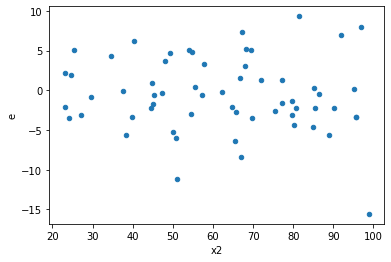

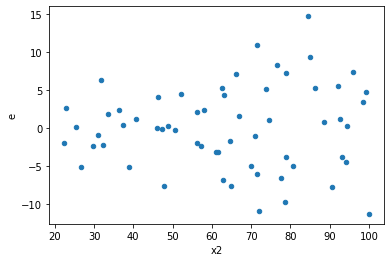

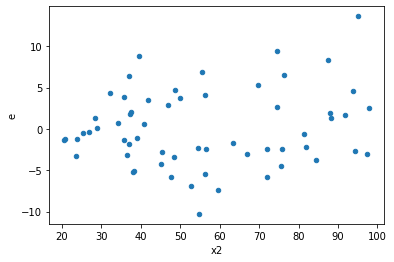

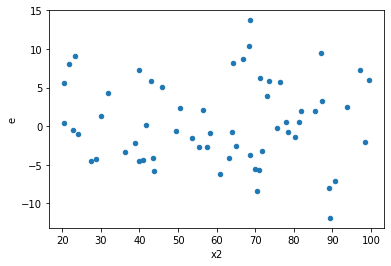

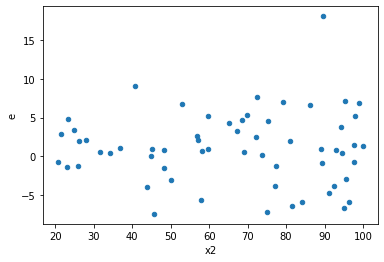

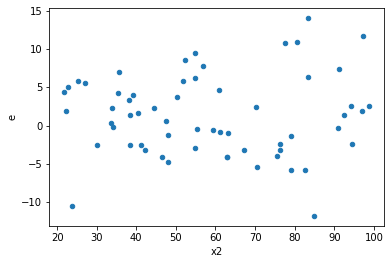

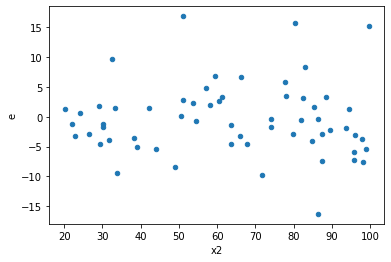

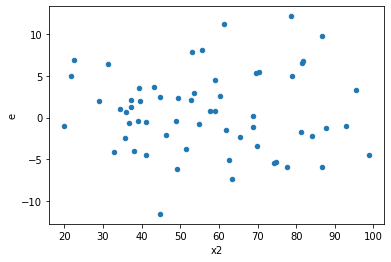

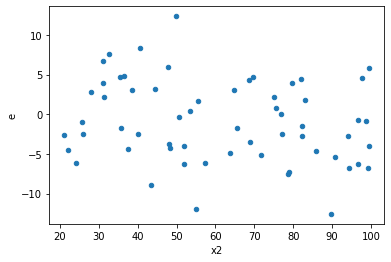

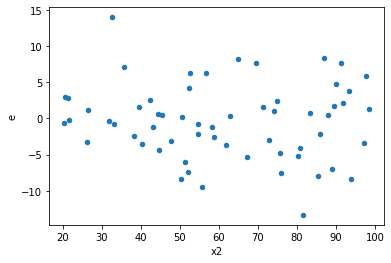

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["y_hat"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
1.0,28.0,24.0,794.0555713888851,897.5369269401219,28.35912754960304,37.397371955838416,1.3187067158686936,0.4947188615892355,0.7526405692053822,0.24735943079461775,Reject001=1 : Homoscedasticity
2.0,26.0,26.0,384.11673361037896,728.3168277703137,14.773720523476113,28.012185683473604,1.8960820085205325,0.10910962883064634,0.9454451855846768,0.05455481441532317,Reject001=1 : Homoscedasticity
3.0,14.0,38.0,277.4203562596872,1121.1198578385604,19.8157397328348,29.503154153646324,1.4888747304628462,0.3248691416003331,0.8375654291998335,0.16243457080016654,Reject001=1 : Homoscedasticity
5.0,33.0,19.0,807.7933815990812,660.254079810615,24.47858732118428,34.750214726874475,1.4196168378066865,0.42367509279583304,0.7881624536020835,0.21183754639791652,Reject001=1 : Homoscedasticity
6.0,30.0,22.0,1110.7985172255542,853.8324088190727,37.026617240851806,38.81056403723058,1.0481801182315549,0.9229027747698502,0.5385486126150749,0.4614513873849251,Reject001=1 : Homoscedasticity
11.0,24.0,28.0,441.6225226303585,614.0731100952095,18.400938442931604,21.93118250340034,1.1918513053786568,0.6507590049253915,0.6746204975373042,0.32537950246269576,Reject001=1 : Homoscedasticity
12.0,29.0,23.0,765.4862369071702,1105.4866110456355,26.396077134730007,48.06463526285372,1.8209006973848332,0.1441408469343317,0.9279295765328341,0.07207042346716586,Reject001=1 : Homoscedasticity
15.0,31.0,21.0,926.5345625983375,692.1086584837456,29.888211696720564,32.95755516589264,1.1026941156706562,0.8292711293397144,0.5853644353301428,0.4146355646698572,Reject001=1 : Homoscedasticity
16.0,28.0,24.0,639.2794055564491,751.9238612026145,22.83140734130175,31.33016088344227,1.3722395827420752,0.4343783690263594,0.7828108154868203,0.2171891845131797,Reject001=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,21.0,31.0,597.5099446159414,620.4388783764434,28.45285450552102,20.014157366982047,0.7034147439617519,0.40419354713215855,Reject001=1 : Homoscedasticity
1.0,28.0,24.0,794.0555713888851,897.5369269401219,28.35912754960304,37.397371955838416,1.3187067158686936,0.4947188615892355,Reject001=1 : Homoscedasticity
2.0,26.0,26.0,384.11673361037896,728.3168277703137,14.773720523476113,28.012185683473604,1.8960820085205325,0.10910962883064634,Reject001=1 : Homoscedasticity
3.0,14.0,38.0,277.4203562596872,1121.1198578385604,19.8157397328348,29.503154153646324,1.4888747304628462,0.3248691416003331,Reject001=1 : Homoscedasticity
4.0,29.0,23.0,627.0937370677146,374.8512577673705,21.62392196785223,16.29788077249437,0.7536967991617821,0.4671239669216328,Reject001=1 : Homoscedasticity
5.0,33.0,19.0,807.7933815990812,660.254079810615,24.47858732118428,34.750214726874475,1.4196168378066865,0.42367509279583304,Reject001=1 : Homoscedasticity
6.0,30.0,22.0,1110.7985172255542,853.8324088190727,37.026617240851806,38.81056403723058,1.0481801182315549,0.9229027747698502,Reject001=1 : Homoscedasticity
7.0,28.0,24.0,539.3469819914237,400.66904000592484,19.262392213979417,16.694543333580203,0.8666910707728382,0.7107522902111737,Reject001=1 : Homoscedasticity
8.0,35.0,17.0,901.820665072709,240.76364898794748,25.766304716363113,14.162567587526322,0.5496545873934442,0.1321633723399141,Reject001=1 : Homoscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      961
Reject001=0 : Heteroscedasticity     39
Name: Result_test, dtype: int64